<a href="https://colab.research.google.com/github/nathaliemondoukpe12/app_gest_task/blob/main/analyseDiscriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/diabetes.csv')

In [ ]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
data.info()         # type de colonnes et valeurs manquantes




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
display(data.describe().round(2))      # statistiques descriptives pour les colonnes numériques

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
# Calculer la distribution en pourcentage de la variable 'Outcome'
outcome_percentage = data['Outcome'].value_counts(normalize=True) * 100
print("Distribution en pourcentage de la variable 'Outcome' :\n")
print(outcome_percentage.to_string(float_format="%.2f%%"))

Distribution en pourcentage de la variable 'Outcome' :

Outcome
0   65.10%
1   34.90%


In [ ]:
# nombre de lignes
nombre_de_lignes = len(data)


print(nombre_de_lignes)

768


Outcome
0    500
1    268
Name: count, dtype: int64


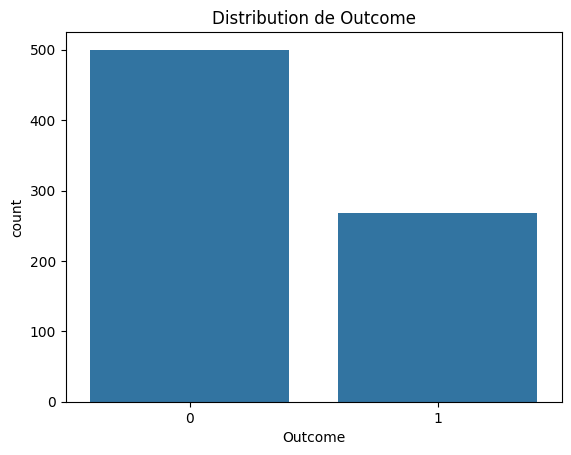

In [ ]:
#Distribution catégorielle
print(data['Outcome'].value_counts())
sns.countplot(x='Outcome', data=data)
plt.title('Distribution de Outcome')
plt.show()

<Figure size 600x400 with 0 Axes>

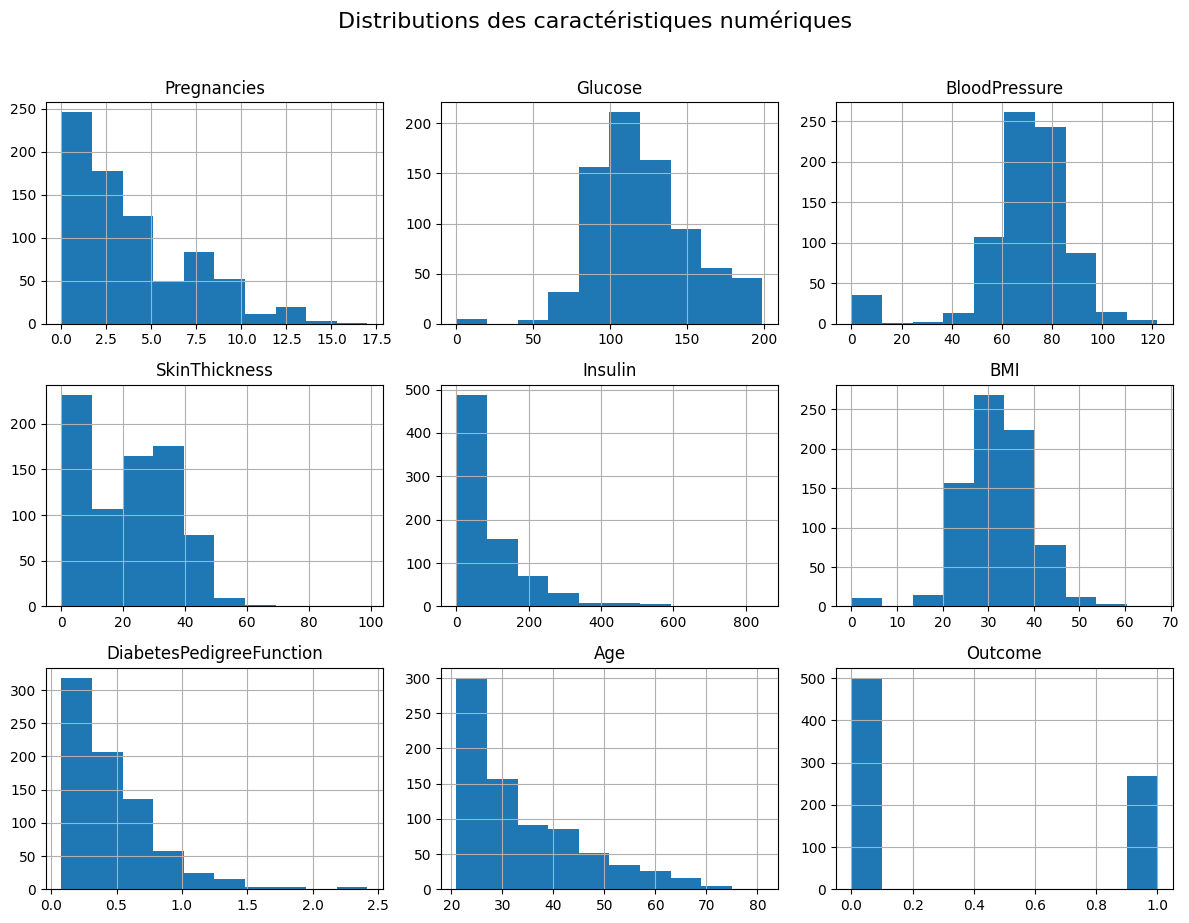

In [ ]:
#visualisation des différentes variables données
plt.figure(figsize=(6, 4))
data.hist(figsize=(12, 9))
plt.suptitle('Distributions des caractéristiques numériques', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

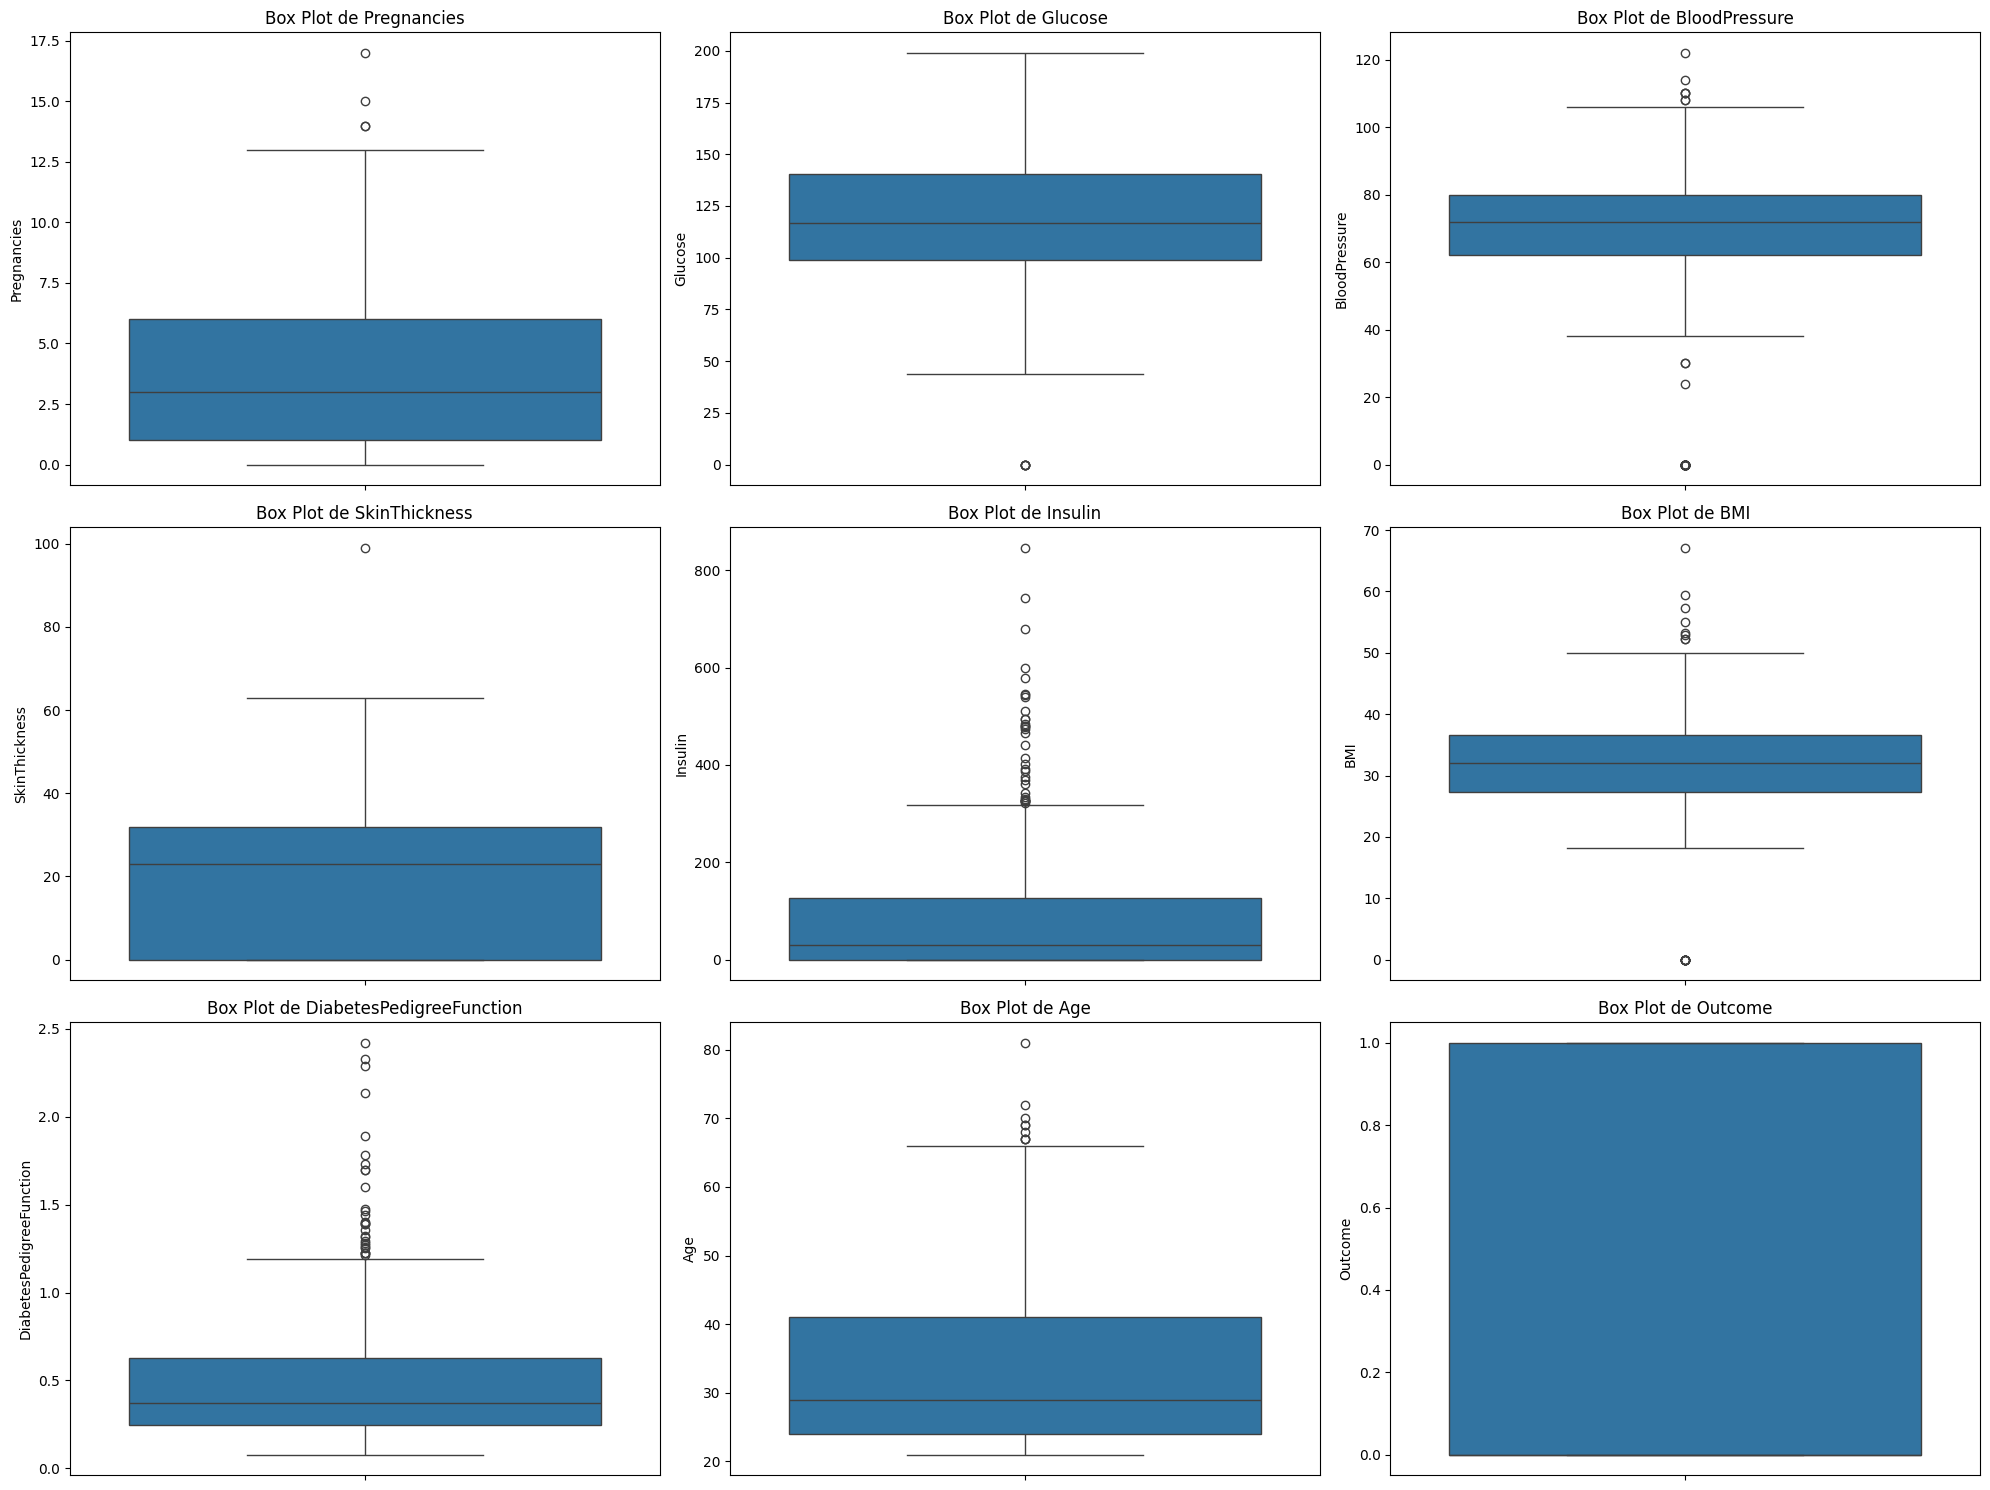

In [ ]:
# Détection des outliers à l'aide de box plots pour les colonnes numériques
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1) # Ajuster le nombre de sous-graphiques si plus de colonnes
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot de {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Vérifier les valeurs manquantes explicites (NaN)
print("Nombre de valeurs manquantes explicites par colonne :")
print(data.isnull().sum())

print("\nDe plus, nous avons noté que les colonnes suivantes contiennent des '0' qui sont probablement des valeurs manquantes : Glucose, BloodPressure, SkinThickness, Insulin, BMI.")

Nombre de valeurs manquantes explicites par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

De plus, nous avons noté que les colonnes suivantes contiennent des '0' qui sont probablement des valeurs manquantes : Glucose, BloodPressure, SkinThickness, Insulin, BMI.


### Gestion des valeurs aberrantes par Winsorisation

In [ ]:
# Appliquer la winsorisation aux colonnes numériques
# Nous allons utiliser le 1er et le 99ème percentile comme seuils

for column in data.select_dtypes(include=np.number).columns:
    # Exclure 'Outcome' car c'est notre variable cible binaire
    if column == 'Outcome':
        continue

    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)

    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

print("Statistiques descriptives après winsorisation :")
display(data.describe())

Statistiques descriptives après winsorisation :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.272135,69.053385,20.433125,78.604427,31.936031,0.468461,33.205729,0.348958
std,3.336808,30.807518,19.243340,15.646206,109.425722,7.712781,0.314849,11.645318,0.476951
min,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000


### Visualisation des données après winsorisation

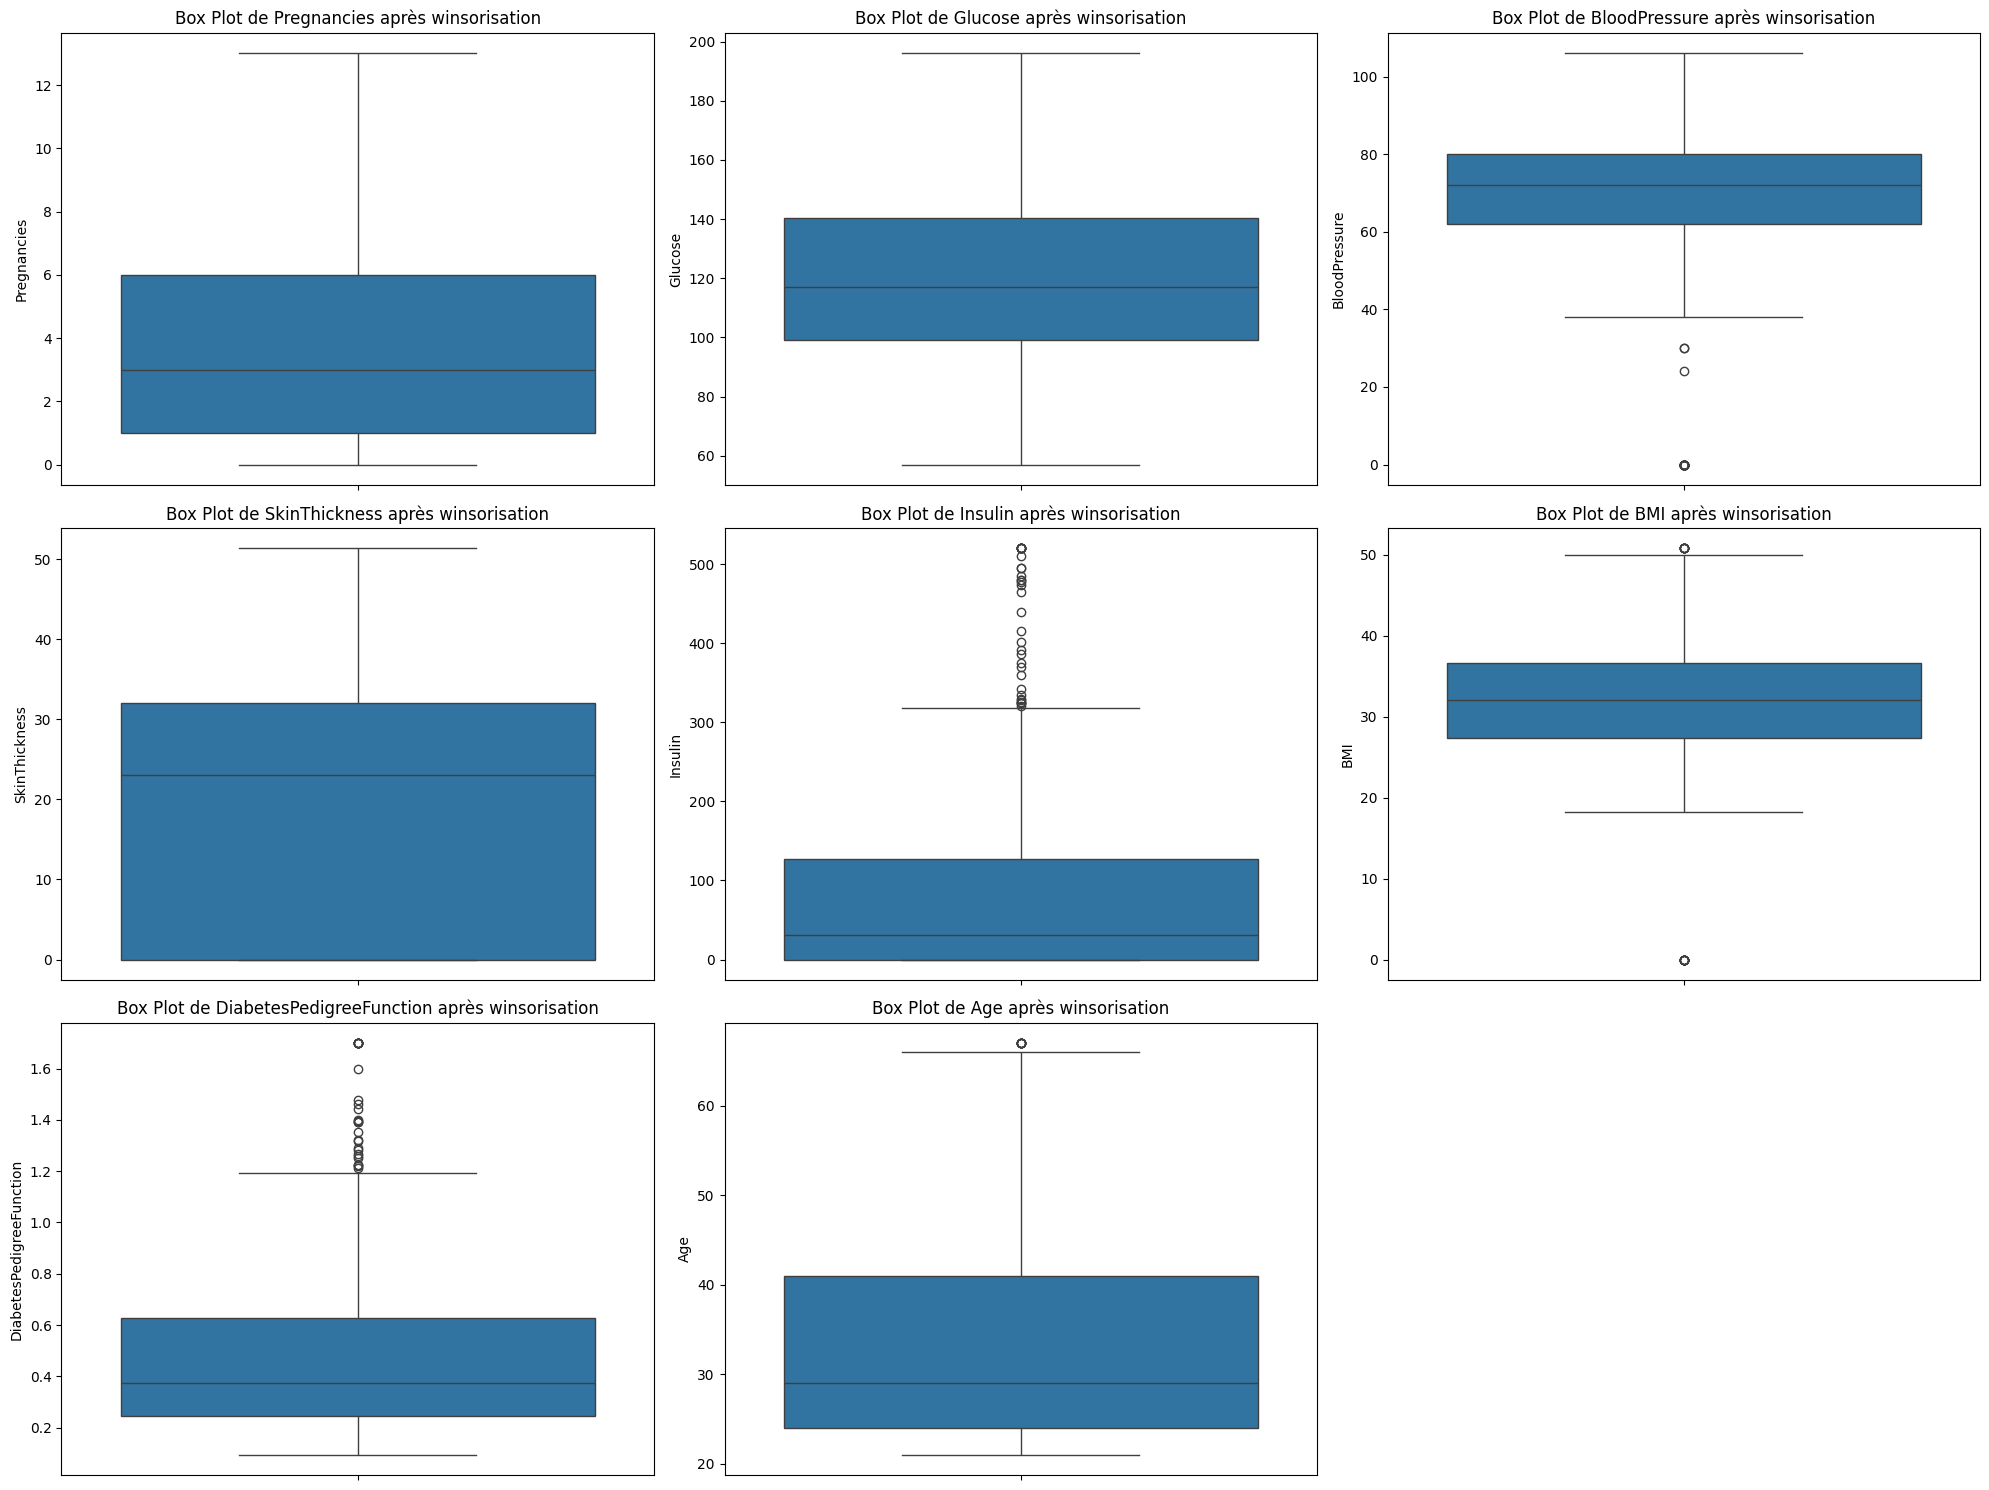

In [ ]:
# Visualiser les box plots après winsorisation pour vérifier l'impact
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.select_dtypes(include=np.number).columns):
    if column == 'Outcome': # Exclure la colonne 'Outcome' pour les box plots
        continue
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot de {column} après winsorisation')
plt.tight_layout()
plt.show()

In [ ]:
# Colonnes où '0' représente une valeur manquante
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les '0' par NaN dans ces colonnes
for col in columns_with_zero_as_missing:
    data[col] = data[col].replace(0, np.nan)

# Imputer les NaN avec la médiane de chaque colonne
for col in columns_with_zero_as_missing:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

print("Nombre de valeurs manquantes après imputation :")
print(data.isnull().sum())

print("\nStatistiques descriptives après imputation :")
display(data[columns_with_zero_as_missing].describe())

Nombre de valeurs manquantes après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques descriptives après imputation :


/tmp/ipython-input-155911755.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.272135,72.334635,29.004740,139.476823,32.398661
std,30.807518,11.930208,8.330057,79.375832,6.681874
min,57.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,196.000000,106.000000,51.330000,519.900000,50.759000


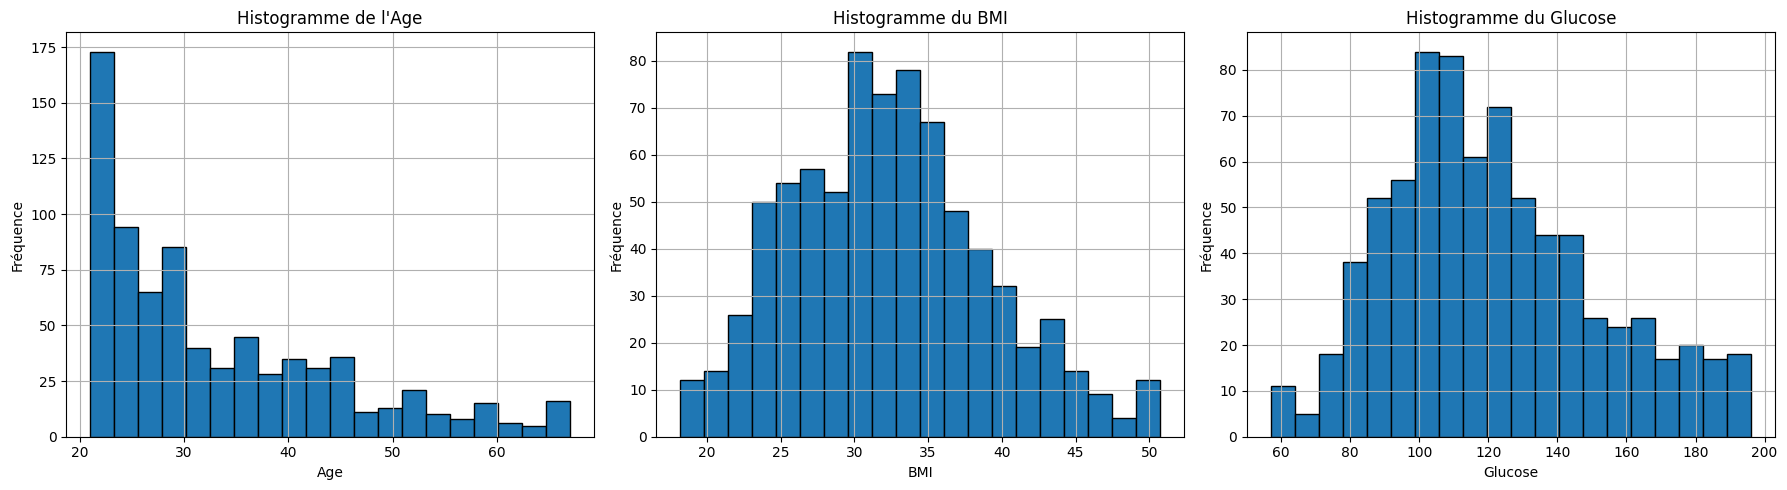

In [ ]:
plt.figure(figsize=(18, 5))

# Histogramme pour Age
plt.subplot(1, 3, 1)
data['Age'].hist(bins=20, edgecolor='black')
plt.title('Histogramme de l\'Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')

# Histogramme pour BMI
plt.subplot(1, 3, 2)
data['BMI'].hist(bins=20, edgecolor='black')
plt.title('Histogramme du BMI')
plt.xlabel('BMI')
plt.ylabel('Fréquence')

# Histogramme pour Glucose
plt.subplot(1, 3, 3)
data['Glucose'].hist(bins=20, edgecolor='black')
plt.title('Histogramme du Glucose')
plt.xlabel('Glucose')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

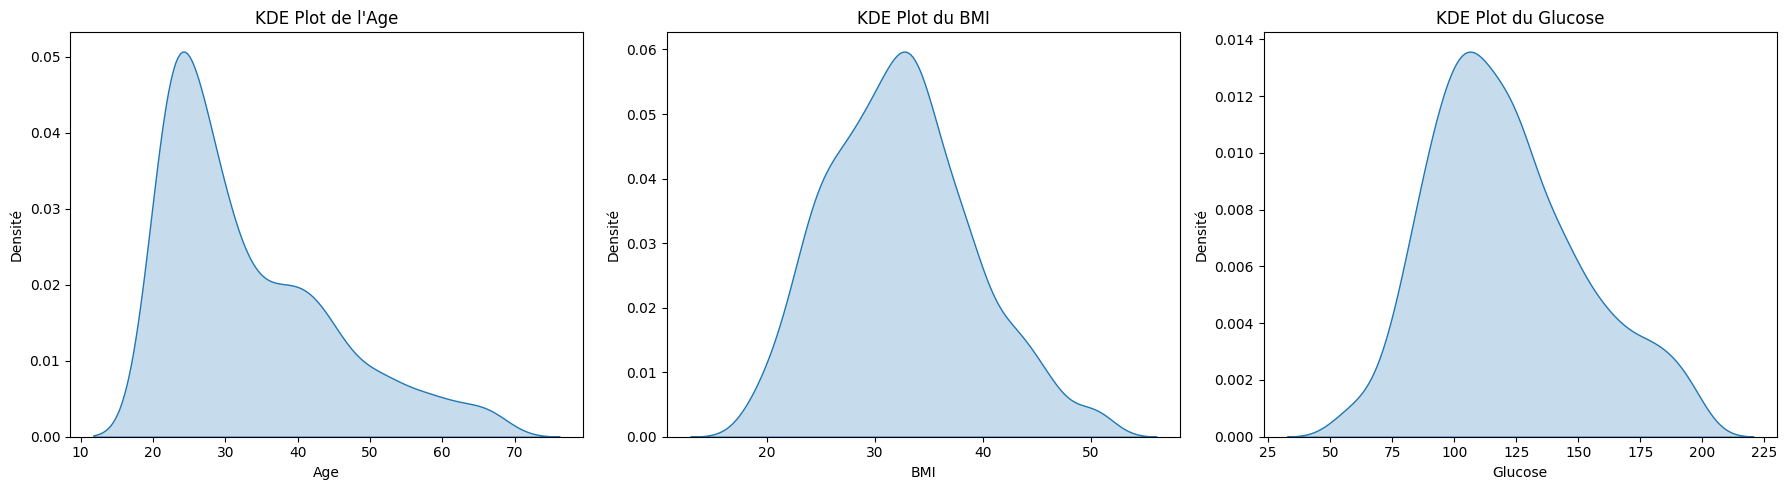

In [ ]:
plt.figure(figsize=(18, 5))

# KDE Plot pour Age
plt.subplot(1, 3, 1)
sns.kdeplot(data['Age'], fill=True)
plt.title('KDE Plot de l\'Age')
plt.xlabel('Age')
plt.ylabel('Densité')

# KDE Plot pour BMI
plt.subplot(1, 3, 2)
sns.kdeplot(data['BMI'], fill=True)
plt.title('KDE Plot du BMI')
plt.xlabel('BMI')
plt.ylabel('Densité')

# KDE Plot pour Glucose
plt.subplot(1, 3, 3)
sns.kdeplot(data['Glucose'], fill=True)
plt.title('KDE Plot du Glucose')
plt.xlabel('Glucose')
plt.ylabel('Densité')

plt.tight_layout()
plt.show()

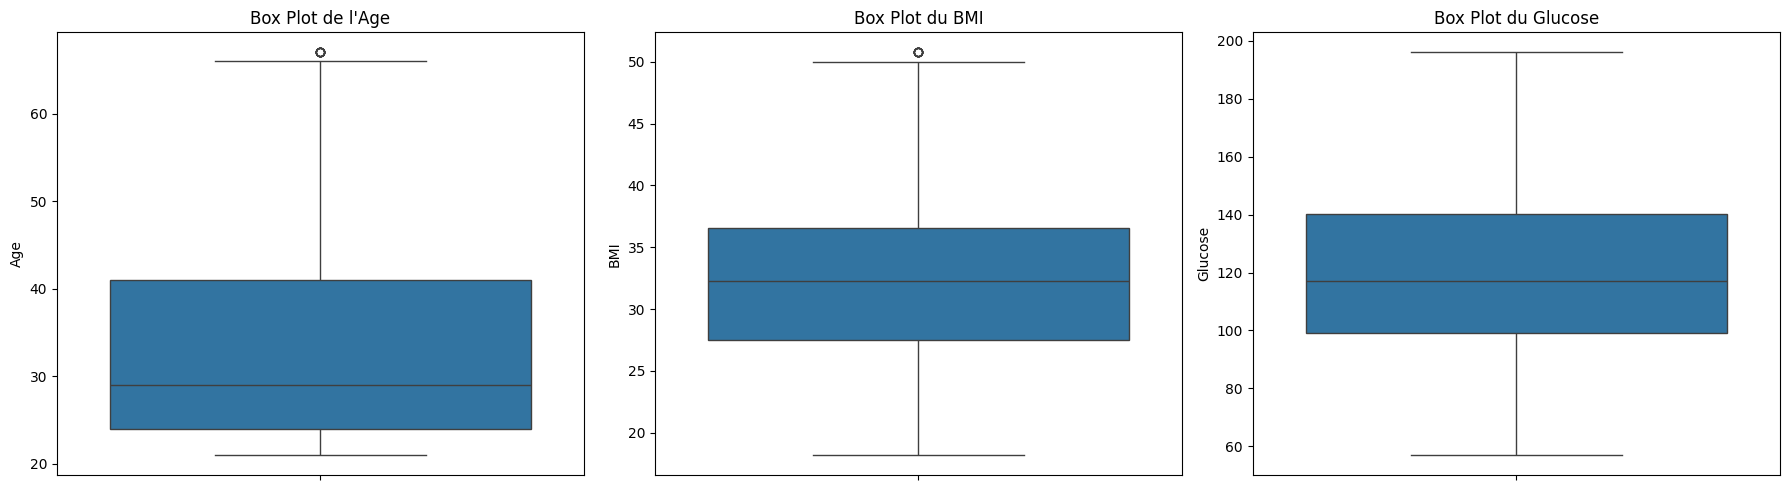

In [ ]:
plt.figure(figsize=(18, 5))

# Boxplot pour Age
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'])
plt.title('Box Plot de l\'Age')
plt.ylabel('Age')

# Boxplot pour BMI
plt.subplot(1, 3, 2)
sns.boxplot(y=data['BMI'])
plt.title('Box Plot du BMI')
plt.ylabel('BMI')

# Boxplot pour Glucose
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Glucose'])
plt.title('Box Plot du Glucose')
plt.ylabel('Glucose')

plt.tight_layout()
plt.show()




une heatmap des corrélations pour toutes les variables numériques du DataFrame permet de visualiser les relations linéaires entre elles.


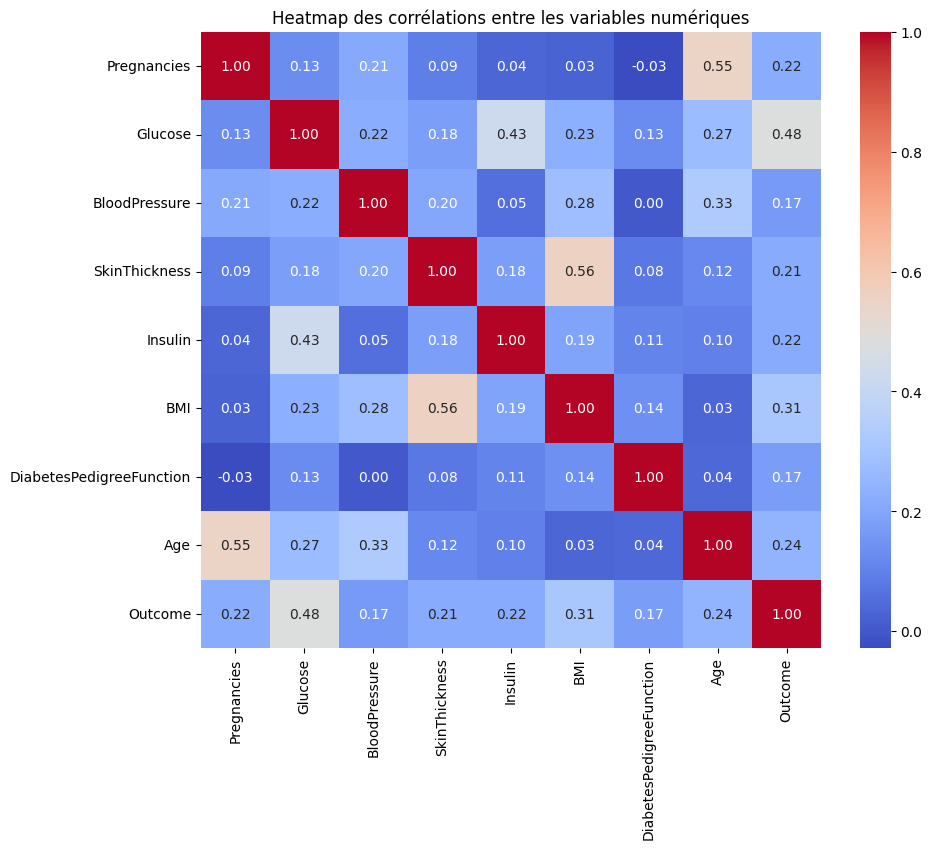

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des corrélations entre les variables numériques')
plt.show()

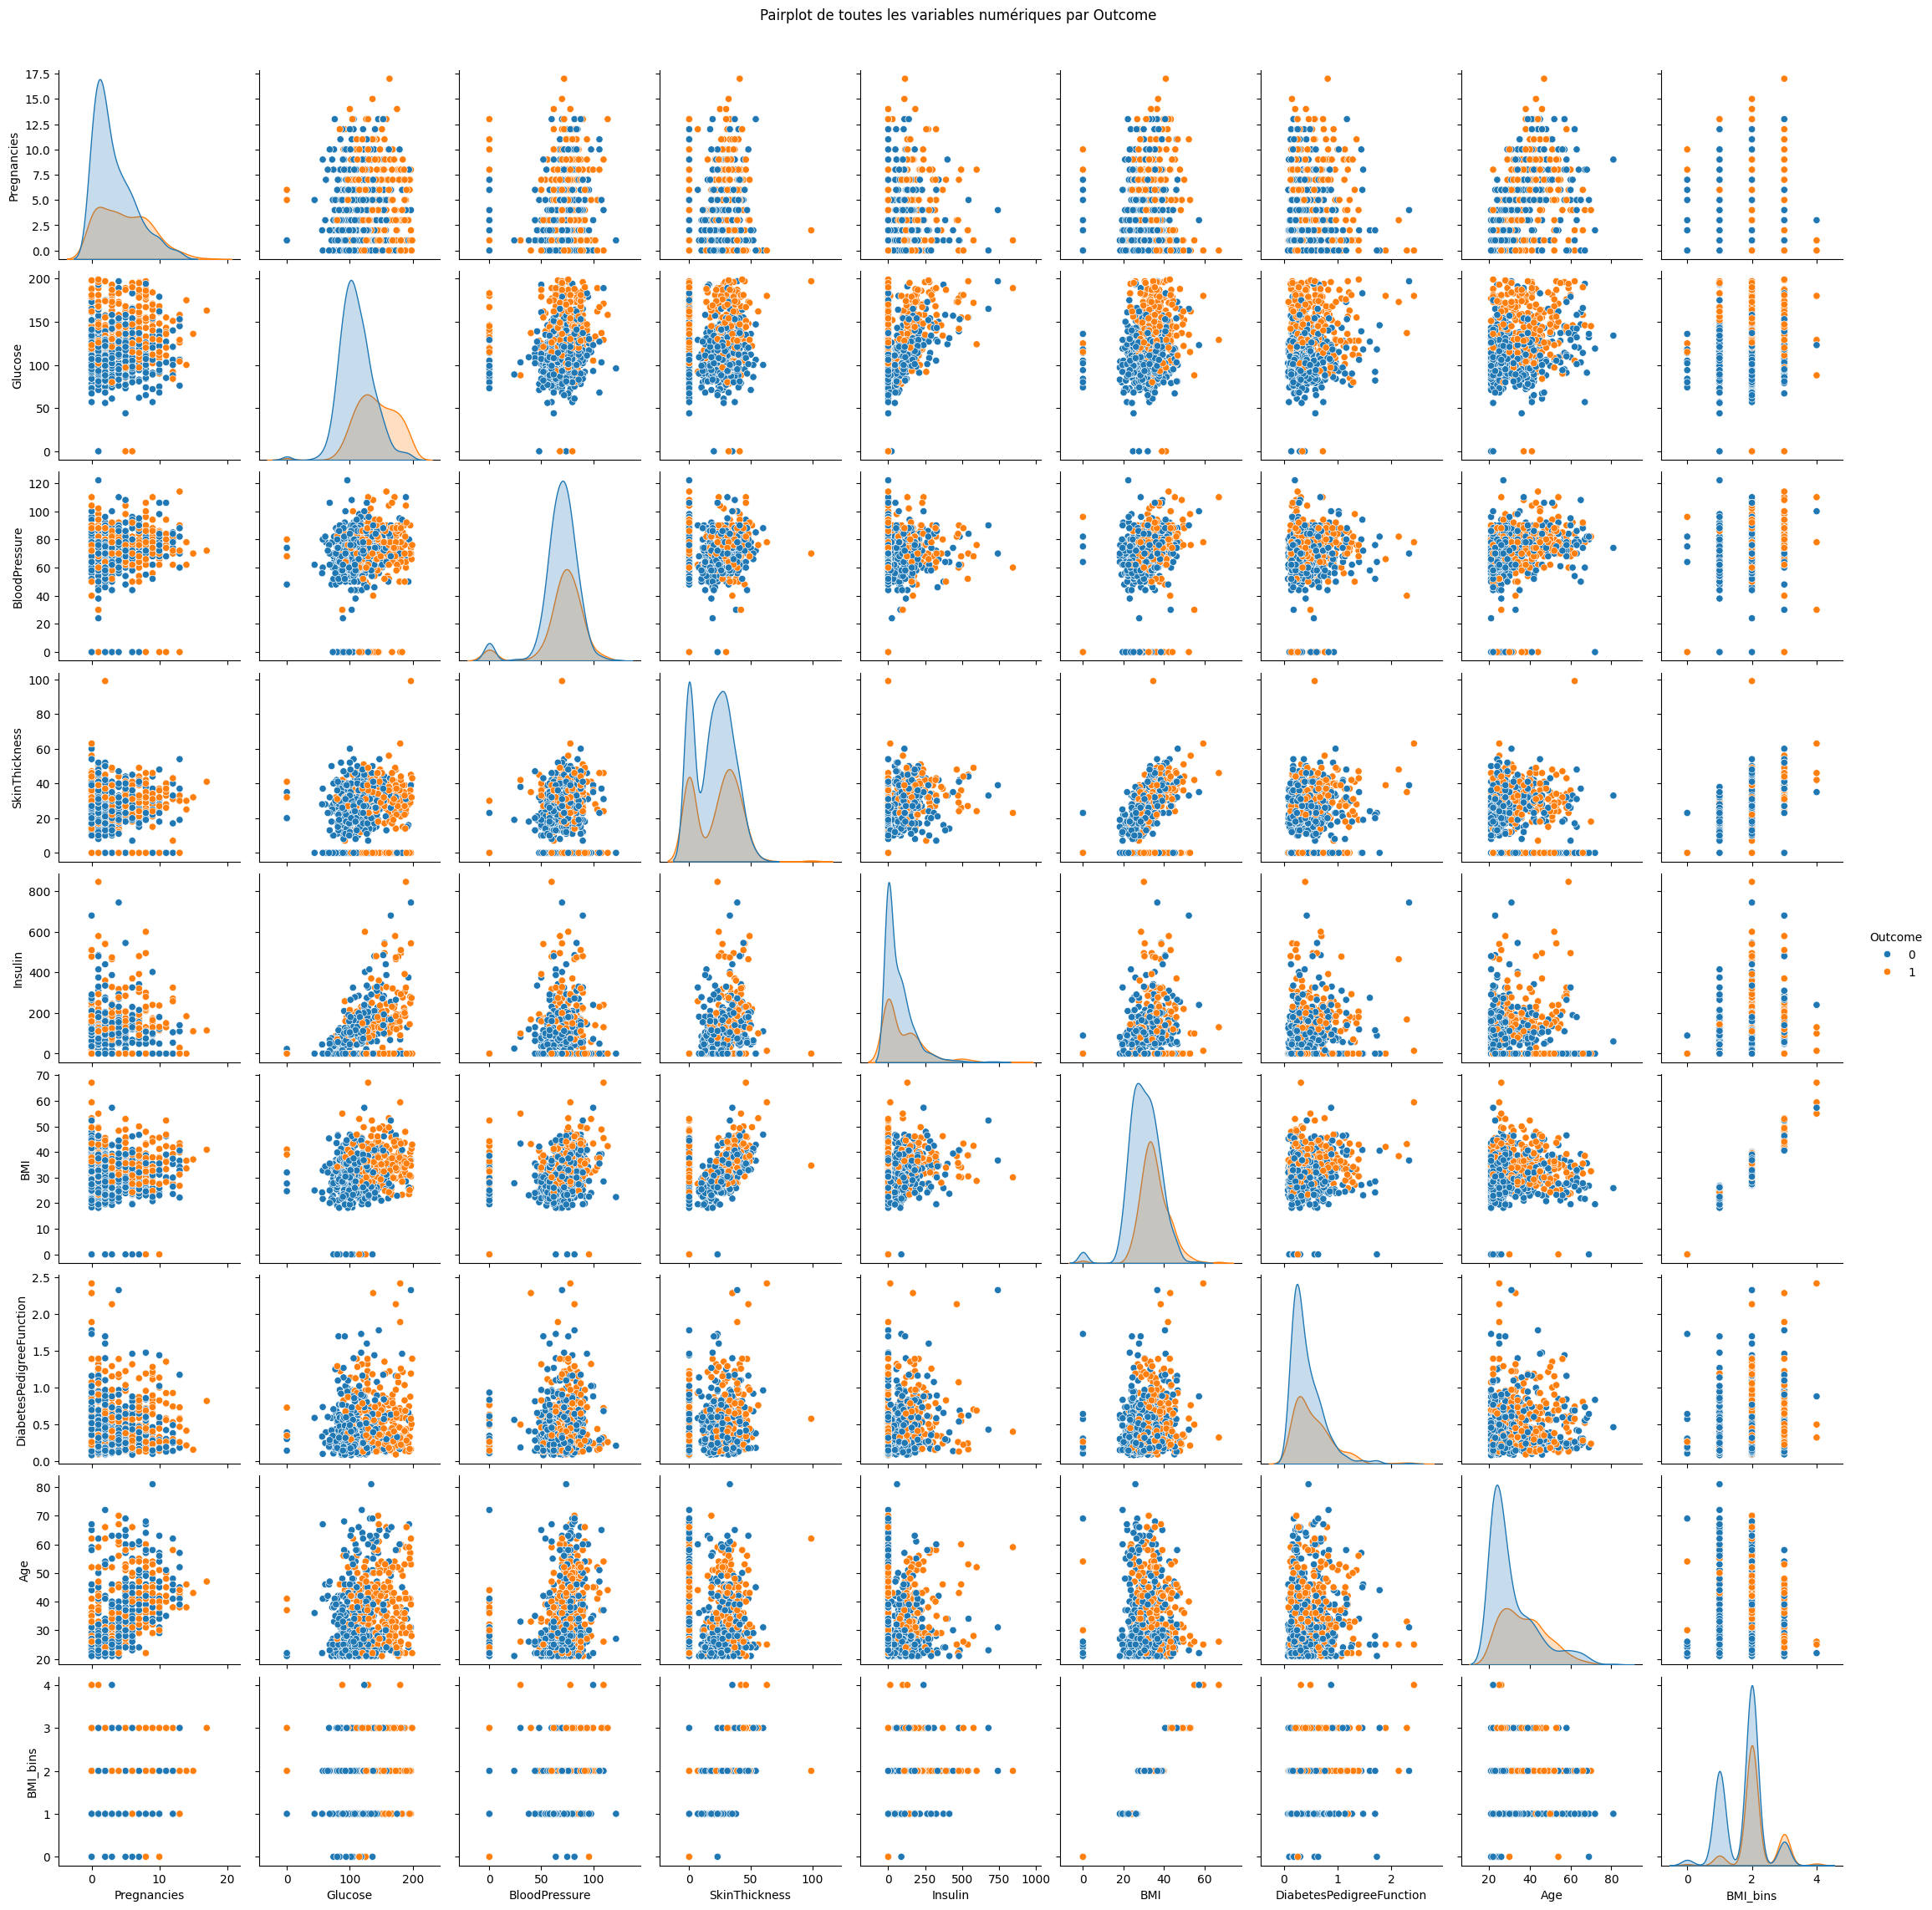

In [ ]:
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot de toutes les variables numériques par Outcome', y=1.02) # Ajuste le titre pour qu'il ne chevauche pas les graphiques
plt.show()

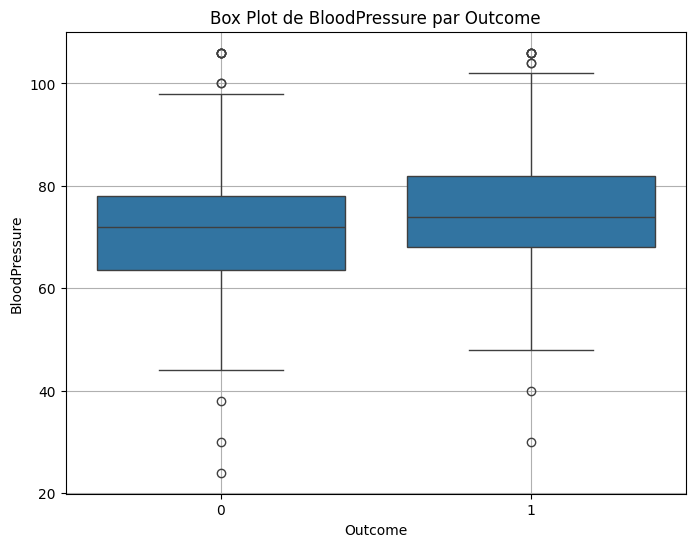

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=data)
plt.title('Box Plot de BloodPressure par Outcome')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.grid(True)
plt.show()

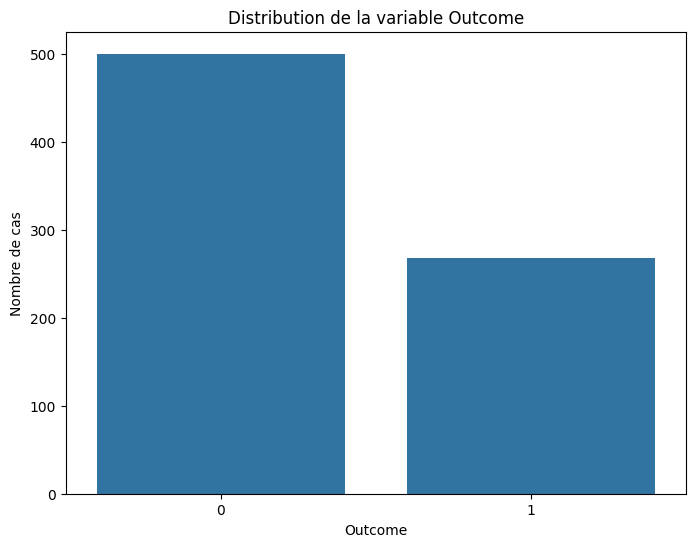

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution de la variable Outcome')
plt.xlabel('Outcome')
plt.ylabel('Nombre de cas')
plt.show()

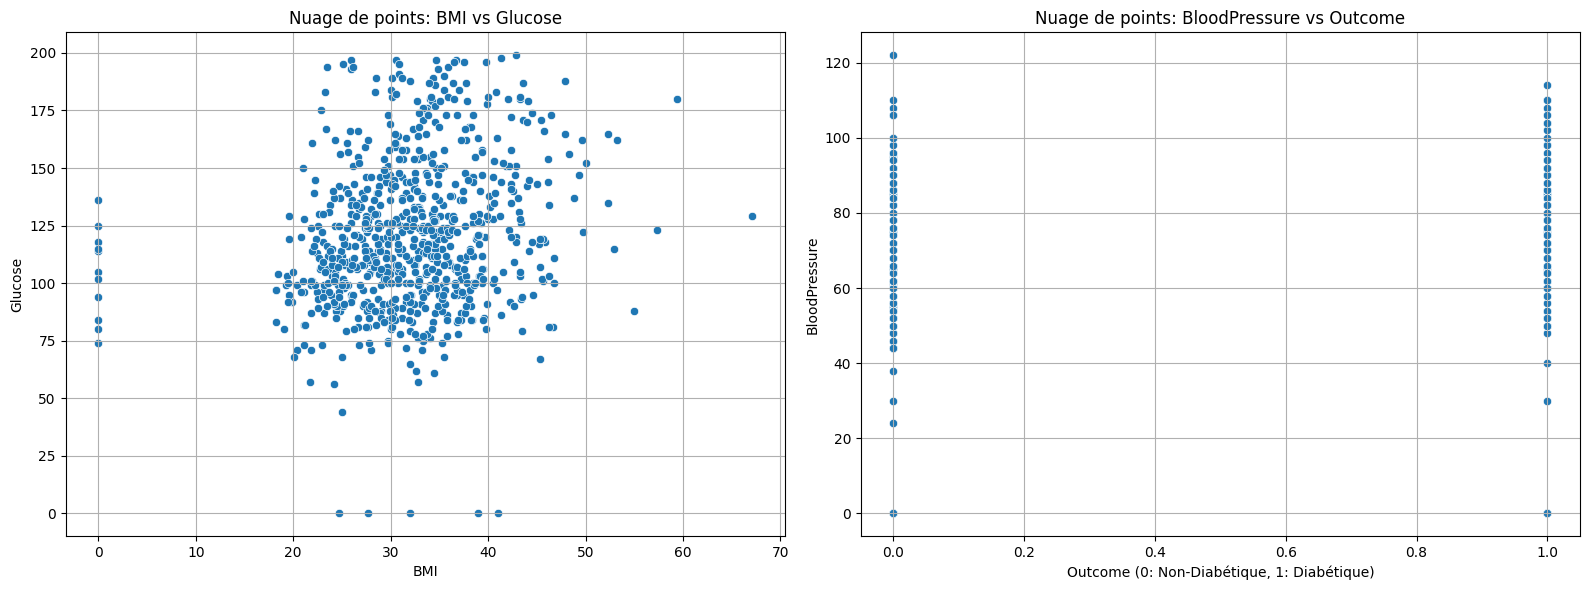

In [ ]:
plt.figure(figsize=(16, 6))

# Premier sous-graphique: BMI vs Glucose
plt.subplot(1, 2, 1)
sns.scatterplot(x='BMI', y='Glucose', data=data)
plt.title('Nuage de points: BMI vs Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.grid(True)

# Deuxième sous-graphique: BloodPressure vs Outcome
plt.subplot(1, 2, 2)
sns.scatterplot(x='Outcome', y='BloodPressure', data=data)
plt.title('Nuage de points: BloodPressure vs Outcome')
plt.xlabel('Outcome (0: Non-Diabétique, 1: Diabétique)')
plt.ylabel('BloodPressure')
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3434960365.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI_bins_labels', y='Glucose', data=bmi_glucose_mean, palette='viridis')


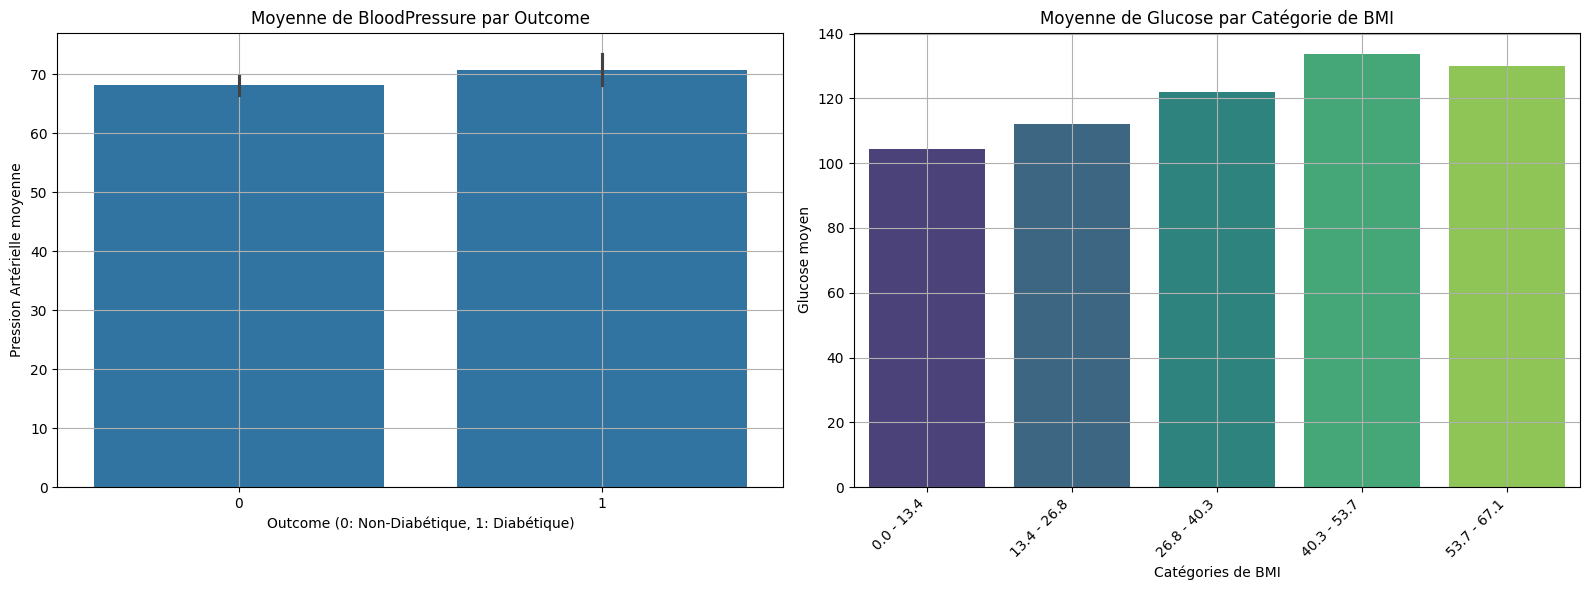

In [ ]:
plt.figure(figsize=(16, 6))

# Barplot pour la moyenne de BloodPressure par Outcome
plt.subplot(1, 2, 1)
sns.barplot(x='Outcome', y='BloodPressure', data=data)
plt.title('Moyenne de BloodPressure par Outcome')
plt.xlabel('Outcome (0: Non-Diabétique, 1: Diabétique)')
plt.ylabel('Pression Artérielle moyenne')
plt.grid(True)

# Pour BMI vs Glucose, nous allons créer des bins pour BMI pour un barplot significatif
# Créer des bins pour BMI
# Nous allons utiliser 5 bins pour avoir une visualisation claire
data['BMI_bins'] = pd.cut(data['BMI'], bins=5, labels=False, include_lowest=True)

# Calculer la moyenne du Glucose pour chaque bin de BMI
bmi_glucose_mean = data.groupby('BMI_bins')['Glucose'].mean().reset_index()

# Mapper les étiquettes de bin aux intervalles réels pour une meilleure lisibilité
bmi_bins_labels = [f'{data["BMI"].min() + i * (data["BMI"].max() - data["BMI"].min()) / 5:.1f} - {data["BMI"].min() + (i+1) * (data["BMI"].max() - data["BMI"].min()) / 5:.1f}' for i in range(5)]
bmi_glucose_mean['BMI_bins_labels'] = bmi_glucose_mean['BMI_bins'].map(lambda x: bmi_bins_labels[x])

# Barplot pour la moyenne de Glucose par catégories de BMI
plt.subplot(1, 2, 2)
sns.barplot(x='BMI_bins_labels', y='Glucose', data=bmi_glucose_mean, palette='viridis')
plt.title('Moyenne de Glucose par Catégorie de BMI')
plt.xlabel('Catégories de BMI')
plt.ylabel('Glucose moyen')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifier les colonnes numériques, excluant 'Outcome'
numerical_cols = data.select_dtypes(include=np.number).columns
features = [col for col in numerical_cols if col != 'Outcome']

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer le StandardScaler aux caractéristiques sélectionnées
scaled_features = scaler.fit_transform(data[features])

print("Dimensions des caractéristiques après standardisation :", scaled_features.shape)
print("Premières 5 lignes des caractéristiques standardisées :\n", scaled_features[:5])

Dimensions des caractéristiques après standardisation : (768, 9)
Premières 5 lignes des caractéristiques standardisées :
 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954   0.19493466]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191 -1.38095814]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415 -1.38095814]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944  0.19493466]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964   1.77082745]]


In [ ]:
from sklearn.decomposition import PCA

# Initialiser PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Appliquer PCA aux caractéristiques standardisées
pca_components = pca.fit_transform(scaled_features)

print("Dimensions des composantes principales après PCA :", pca_components.shape)
print("Premières 5 lignes des composantes principales :\n", pca_components[:5])

Dimensions des composantes principales après PCA : (768, 2)
Premières 5 lignes des composantes principales :
 [[ 0.87563521  1.37999121]
 [-1.57170713 -0.81823565]
 [-1.35650273  1.64477174]
 [-0.71605581 -1.45431711]
 [ 3.07313604 -1.84223492]]


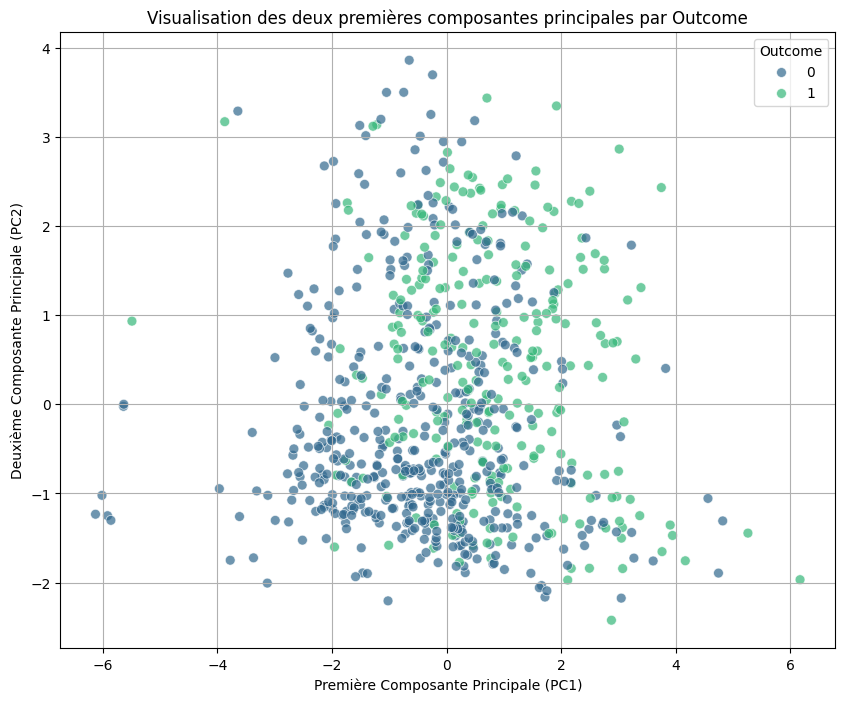

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Créer un DataFrame pour les composantes principales et la variable cible
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = data['Outcome'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Visualisation des deux premières composantes principales par Outcome')
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.legend(title='Outcome', loc='best')
plt.grid(True)
plt.show()